In [1]:
!pip install pandas_datareader

In [2]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Shiba_Inu.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 01, 2020",1.335000e-09,3.277000e-09,4.320000e-10,1.006000e-09,1604789,0
1,"Aug 02, 2020",1.009000e-09,1.073000e-09,3.560000e-10,5.100000e-10,193098,0
2,"Aug 03, 2020",4.990000e-10,5.150000e-10,1.430000e-10,1.450000e-10,129225,0
3,"Aug 04, 2020",1.450000e-10,2.030000e-10,1.380000e-10,1.620000e-10,19717,0
4,"Aug 05, 2020",1.610000e-10,3.300000e-10,1.470000e-10,3.090000e-10,26869,0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02
mean,7.974122e-06,8.775205e-06,7.298359e-06,8.050025e-06,1.094187e+09,3.746261e+09
std,1.489137e-05,1.634728e-05,1.350874e-05,1.495445e-05,3.332535e+09,7.827358e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.200000e+02,0.000000e+00
50%,6.000000e-08,7.000000e-08,5.500000e-08,6.000000e-08,3.667414e+06,0.000000e+00
75%,7.849250e-06,8.235000e-06,7.320000e-06,7.846750e-06,5.012032e+08,3.098050e+09
max,7.924000e-05,8.845000e-05,6.673000e-05,8.000000e-05,3.905385e+10,4.108324e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        490 non-null    object 
 1   Open        490 non-null    float64
 2   High        490 non-null    float64
 3   Low         490 non-null    float64
 4   Close       490 non-null    float64
 5   Volume      490 non-null    int64  
 6   Market Cap  490 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 26.9+ KB


In [6]:
df.shape

(490, 7)

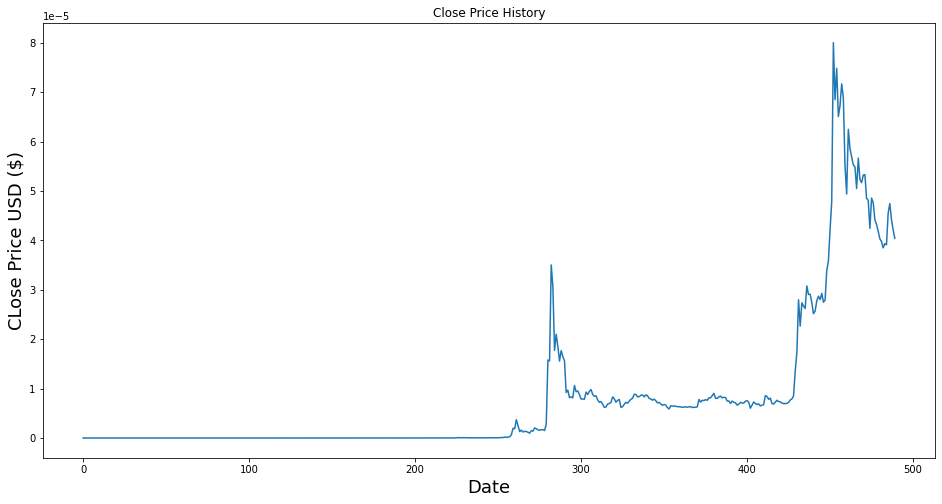

In [7]:
# Visualize  the closing price history

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new df with only the "Close" column

data = df.filter(['Close'])

# Convert the df to a np array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

392

In [9]:
# scale the data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.257500e-05],
       [6.375000e-06],
       [1.812500e-06],
       [2.025000e-06],
       [3.862500e-06],
       [2.912500e-06],
       [2.875000e-06],
       [3.262500e-06],
       [2.962500e-06],
       [2.362500e-06],
       [2.162500e-06],
       [1.875000e-06],
       [1.962500e-06],
       [2.287500e-06],
       [2.112500e-06],
       [2.137500e-06],
       [2.037500e-06],
       [1.987500e-06],
       [2.200000e-06],
       [2.500000e-06],
       [1.462500e-06],
       [1.462500e-06],
       [1.412500e-06],
       [1.462500e-06],
       [1.350000e-06],
       [1.262500e-06],
       [0.000000e+00],
       [1.525000e-06],
       [1.712500e-06],
       [3.100000e-06],
       [3.862500e-06],
       [3.512500e-06],
       [5.875000e-06],
       [6.737500e-06],
       [4.687500e-06],
       [1.950000e-06],
       [1.787500e-06],
       [1.550000e-06],
       [1.662500e-06],
       [1.300000e-06],
       [1.450000e-06],
       [1.450000e-06],
       [1.387500e-06],
       [1.3

In [10]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 40:
        print(x_train)
        print(y_train)
        print()

[array([1.2575e-05, 6.3750e-06, 1.8125e-06, 2.0250e-06, 3.8625e-06,
       2.9125e-06, 2.8750e-06, 3.2625e-06, 2.9625e-06, 2.3625e-06,
       2.1625e-06, 1.8750e-06, 1.9625e-06, 2.2875e-06, 2.1125e-06,
       2.1375e-06, 2.0375e-06, 1.9875e-06, 2.2000e-06, 2.5000e-06,
       1.4625e-06, 1.4625e-06, 1.4125e-06, 1.4625e-06, 1.3500e-06,
       1.2625e-06, 0.0000e+00, 1.5250e-06, 1.7125e-06, 3.1000e-06,
       3.8625e-06, 3.5125e-06, 5.8750e-06, 6.7375e-06, 4.6875e-06,
       1.9500e-06, 1.7875e-06, 1.5500e-06, 1.6625e-06, 1.3000e-06])]
[1.4499999999999997e-06]



In [11]:

# Convert the x_train and y_train to np arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(352, 40, 1)

In [13]:
# build LSTM model

model = keras.Sequential()

model.add(layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [14]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

352/352 [==============================] - 5s 9ms/step - loss: 0.0015


In [16]:
# Create testing data set

# Create a new array containing scaled values from index 312 to 352
test_data = scaled_data[training_data_len - 40: , :]

# Create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len: ,  :]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

In [17]:
# convert the data into a np array

x_test = np.array(x_test)

In [19]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [25]:
# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.635316794725503e-06

<ipython-input-27-c74ed63cabc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicitons'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

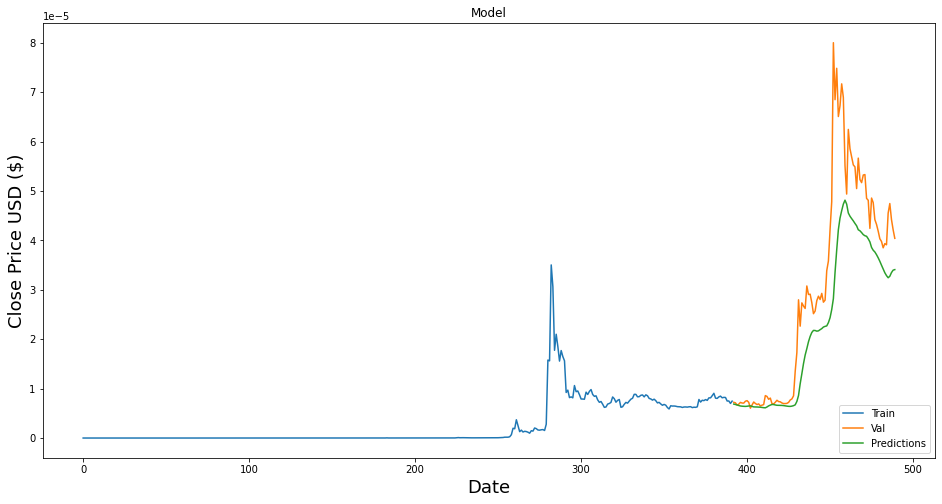

In [27]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicitons'] = predictions

# Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predicitons']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [28]:
valid

,Close,Predicitons
392,0.000007,0.000007
393,0.000007,0.000007
394,0.000007,0.000007
395,0.000007,0.000007
396,0.000007,0.000006
...,...,...
485,0.000046,0.000032
486,0.000047,0.000033
487,0.000044,0.000033
488,0.000042,0.000034
